In [1]:
print("hi there ")

hi there 


In [2]:
 # Weather Analysis and Prediction for Colombo, Sri Lanka


In [3]:

# **Objective**: Analyze historical weather data and build prediction models for temperature and rainfall.


In [4]:

# 1. Import Required Libraries


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [6]:

## 2. Load and Explore the Dataset


In [7]:

df = pd.read_csv('SriLanka_Weather_Dataset.csv')


In [8]:
# Display basic info

In [9]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (147480, 24)

First 5 rows:


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [10]:
print("\nData Types:")
print(df.dtypes)


Data Types:
time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object


In [11]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


In [12]:
## 3. Data Cleaning

In [13]:
# Check for missing values

In [14]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64


In [15]:
# Convert time to datetime and extract features

In [16]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day


In [17]:
#df['time'] = pd.to_datetime(df['time'])

#*Converts the values in the 'time' column of DataFrame df from strings 
#(or whatever format they're in) into pandas datetime objects
#*This enables datetime-specific operations on the column
#----------------------------------------------------------------
#df['year'] = df['time'].dt.year

#*Creates a new column 'year' in the DataFrame
#*Extracts just the year component from each datetime in the 'time' column
#*The .dt accessor is used to access datetime properties/methods
#-------------------------------------------------------------------------
#df['month'] = df['time'].dt.month

#*Creates a new column 'month'
#*Extracts the month component (as a number 1-12) from each datetime
#-------------------------------------------------------------------------
#df['day'] = df['time'].dt.day

#*Creates a new column 'day'
#*Extracts the day of the month component from each datetime

In [18]:
# Drop unnecessary columns

In [19]:
df = df.drop(['latitude', 'longitude', 'elevation', 'country', 'city'], axis=1)

In [20]:
# ## 4. Exploratory Data Analysis (EDA)

In [21]:
# Plot temperature trends

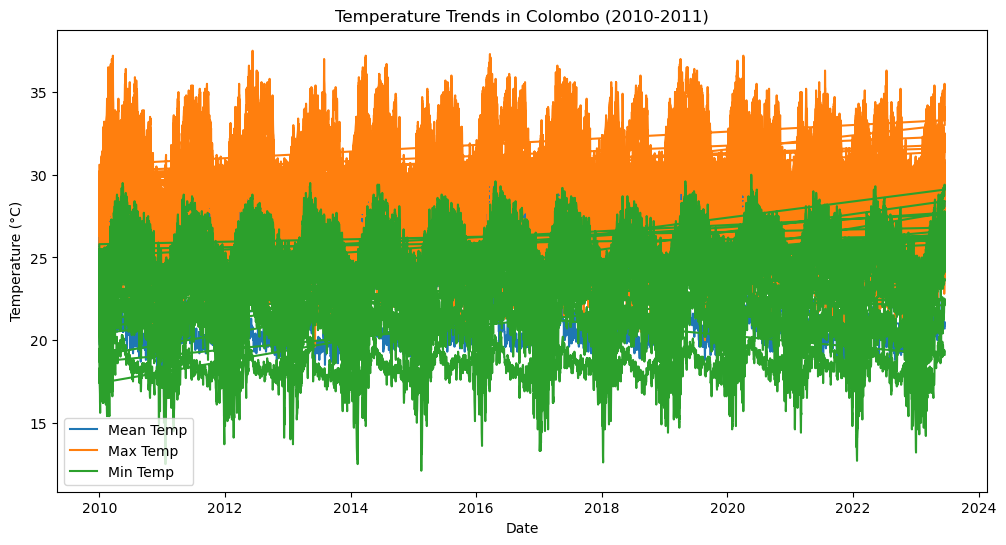

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['temperature_2m_mean'], label='Mean Temp')
plt.plot(df['time'], df['temperature_2m_max'], label='Max Temp')
plt.plot(df['time'], df['temperature_2m_min'], label='Min Temp')
plt.title('Temperature Trends in Colombo (2010-2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [23]:
# Monthly average temperature

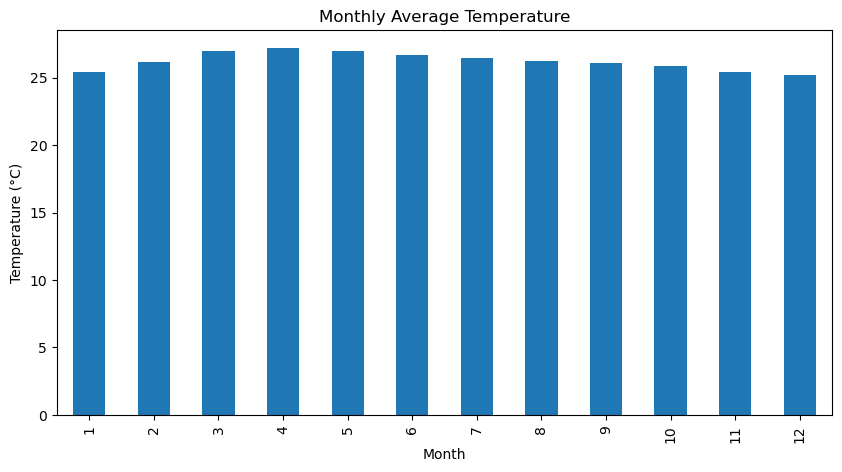

In [24]:
monthly_avg = df.groupby('month')['temperature_2m_mean'].mean()
monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [25]:
# Rainfall analysis

In [26]:
rainy_days = df[df['rain_sum'] > 0]
print(f"Number of rainy days: {len(rainy_days)}/{len(df)}")

Number of rainy days: 120753/147480


In [27]:
## 5. Feature Engineering

In [28]:
# Create lag features for time series prediction

In [29]:
df['temp_lag1'] = df['temperature_2m_mean'].shift(1)
df['temp_lag2'] = df['temperature_2m_mean'].shift(2)

In [30]:

# Create seasonal features


In [31]:
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12,1,2] else 
                                'Spring' if x in [3,4,5] else
                                'Summer' if x in [6,7,8] else 'Fall')

In [32]:
# One-hot encode seasons

In [33]:
df = pd.get_dummies(df, columns=['season'])

In [34]:
# Drop rows with NaN values created by lag features

In [35]:
df = df.dropna()

In [36]:
 ## 6. Model Building - Temperature Prediction

In [37]:
# Prepare features and target

In [38]:
X = df[['month', 'temp_lag1', 'temp_lag2', 'precipitation_sum', 
        'season_Winter', 'season_Spring', 'season_Summer', 'season_Fall']]
y = df['temperature_2m_mean']


In [39]:
# Split data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Linear Regression

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [43]:
# Random Forest

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [45]:
## 7. Model Evaluation

Linear Regression Performance:
MAE: 0.36
MSE: 0.23
RMSE: 0.48


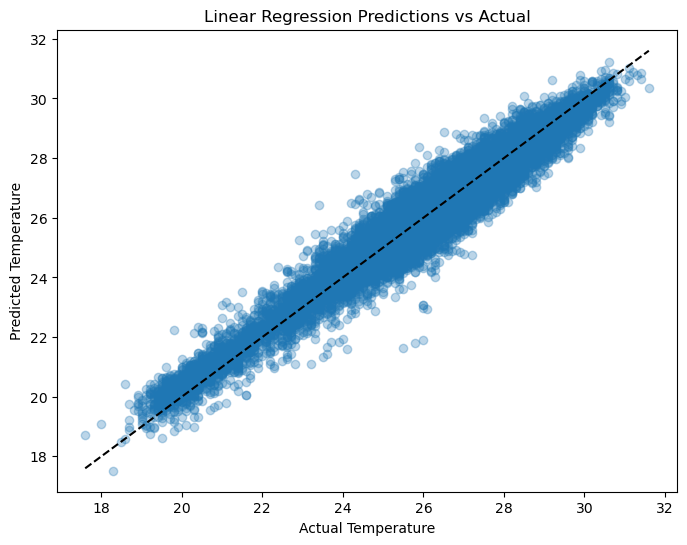

Random Forest Performance:
MAE: 0.30
MSE: 0.17
RMSE: 0.41


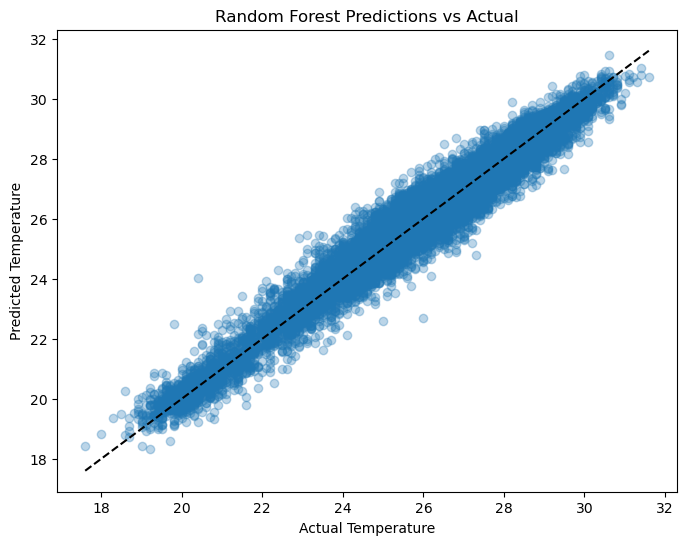

In [46]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title(f'{name} Predictions vs Actual')
    plt.show()

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

In [47]:
# WHAT IS "MAE","MSE","RMSE" AND WHY THEY ARE USED 

In [48]:
##1. MAE: Mean Absolute Error
#Full Form: Mean Absolute Error
#Formula: MAE = (1/n) * Σ|y_true - y_pred|
#Explanation:
#    Measures the average absolute difference between predicted and actual values
#    Gives equal weight to all errors
#    Easier to interpret since it's in the same units as the original data
#    Less sensitive to outliers than MSE/RMSE

#2. MSE: Mean Squared Error
#Full Form: Mean Squared Error
#Formula: MSE = (1/n) * Σ(y_true - y_pred)²
#Explanation:
#    Measures the average squared difference between predicted and actual values
#    More sensitive to large errors (due to squaring)
#    Harder to interpret since units are squared
#    Often used as a loss function in model training

#3. RMSE: Root Mean Squared Error
#Full Form: Root Mean Squared Error
#Formula: RMSE = √MSE
#Explanation:
#    Square root of MSE
#    Brings the error back to the original units
#    More sensitive to large errors than MAE
#    Popular metric as it penalizes larger errors more heavily

In [49]:
#Purpose of the Actual vs. Predicted Plot

In [50]:
#Purpose of the Actual vs. Predicted Plot
#1.Visual Model Assessment:
#    Helps quickly identify if predictions follow the actual values
#    More intuitive than just looking at numerical metrics (MAE, MSE, RMSE)

#2.Diagnosing Model Behavior:
#    Reveals patterns in errors that metrics alone might miss
#    Helps identify systematic biases in predictions

In [51]:
# Feature Importance

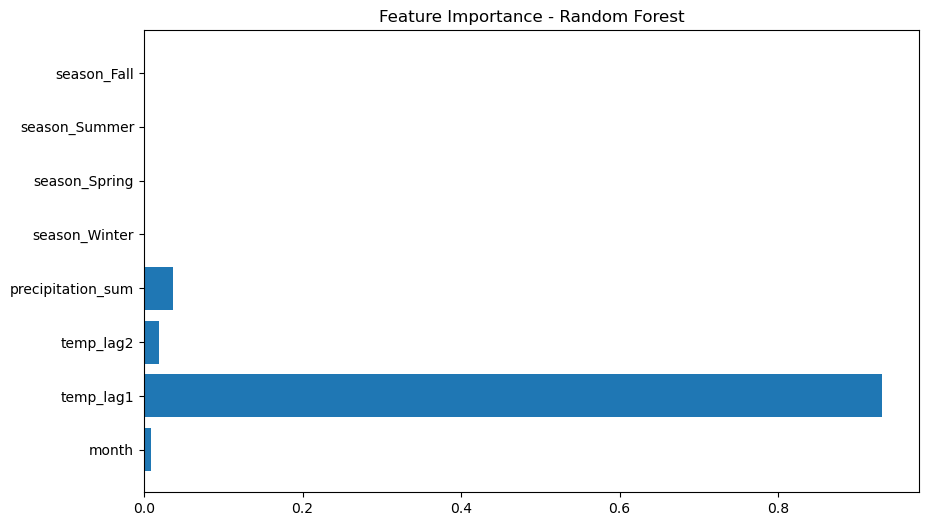

In [52]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title('Feature Importance - Random Forest')
plt.show()

In [53]:
#ET0 Prediction 

In [54]:
#Analyze historical weather data and build prediction models for temperature, rainfall, 
#and evapotranspiration (ET₀).

In [55]:
## 9. Evapotranspiration (ET₀) Prediction

In [56]:
### 9.1 Understanding ET₀ (FAO Reference Evapotranspiration)

# ET₀ represents the evaporative demand of the atmosphere. It's calculated using the 
#FAO Penman-Monteith equation and is influenced by:
    # - Temperature
    # - Solar radiation
    # - Humidity
    # - Wind speed

#The dataset column et0_fao_evapotranspiration suggests this is the method applied.

##Why It’s Used:
    #Gold standard for ET₀ (recommended by the UN Food and Agriculture Organization).
    #Accounts for all key drivers: solar energy, humidity, wind, and temperature.



In [57]:
#1. Feature Selection for ET0 Prediction

In [58]:
# Select relevant features for ET0 prediction
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('SriLanka_Weather_Dataset.csv')
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month

features = ['temperature_2m_mean', 'shortwave_radiation_sum', 'windspeed_10m_max', 'month']
X = df[features]
y = df['et0_fao_evapotranspiration']

df = df.dropna()  # before splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#2. Building ML Models for ET0 Prediction

In [60]:
!pip install xgboost

In [61]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [62]:

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}


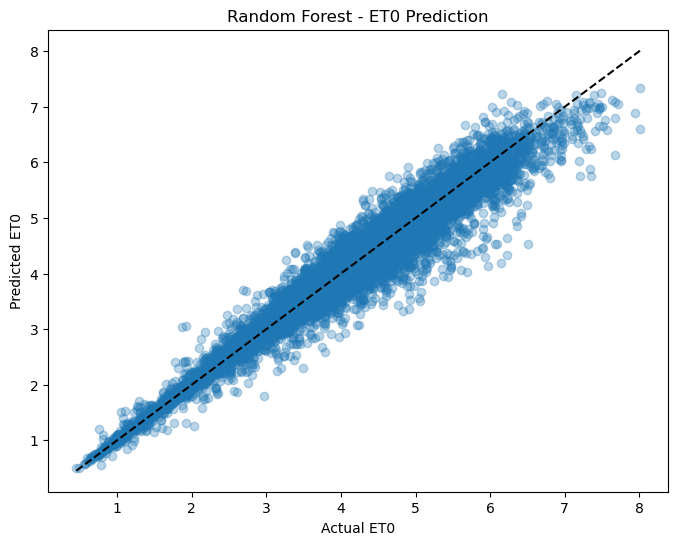

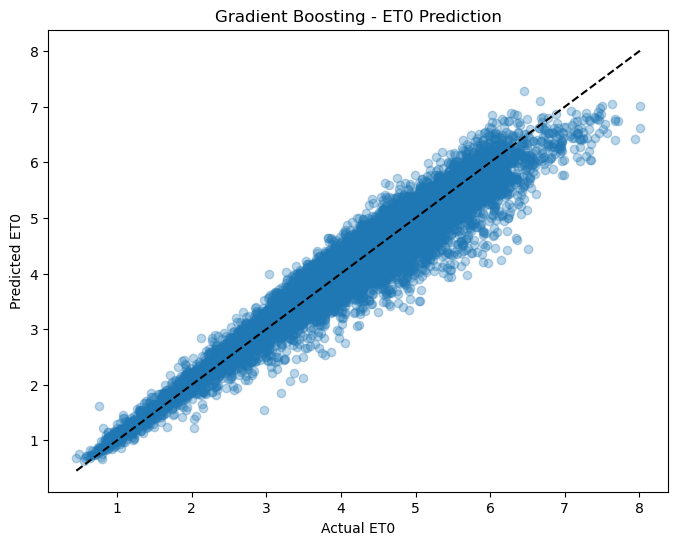

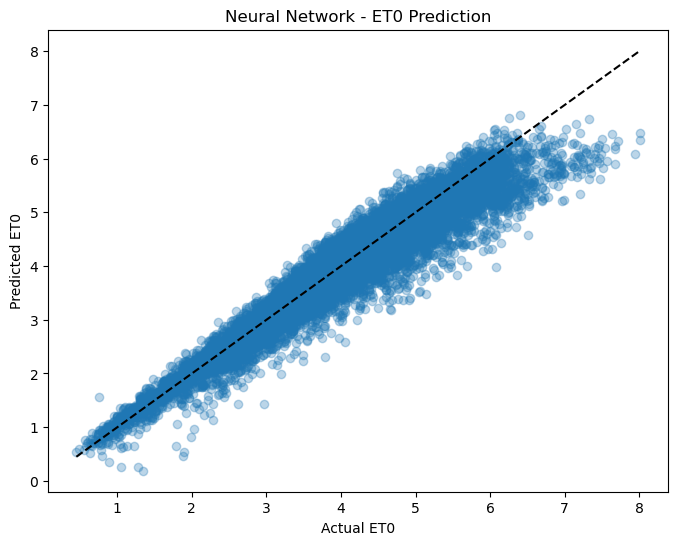

In [63]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MAE': mae, 'R2': r2}
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual ET0')
    plt.ylabel('Predicted ET0')
    plt.title(f'{name} - ET0 Prediction')
    plt.show()


In [64]:
# 8. Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)


Model Performance Comparison:


,MAE,R2
Random Forest,0.104702,0.965735
Gradient Boosting,0.153447,0.949147
Neural Network,0.171243,0.933245


In [65]:
##MAE (Mean Absolute Error):
    #Measures the average absolute difference between predicted and actual values
    #Lower values are better (0 = perfect predictions)
    #Your MAE values (0.1047 to 0.1534) mean predictions are off by ~0.1-0.15 mm/day on average

##R² (R-Squared):
    #Indicates the proportion of variance in ET0 that's predictable from the features
    #Ranges from 0 to 1 (1 = perfect prediction)
    #Your R² values (0.949-0.965) mean models explain 94.9-96.5% of variance




Feature Importance from Random Forest:


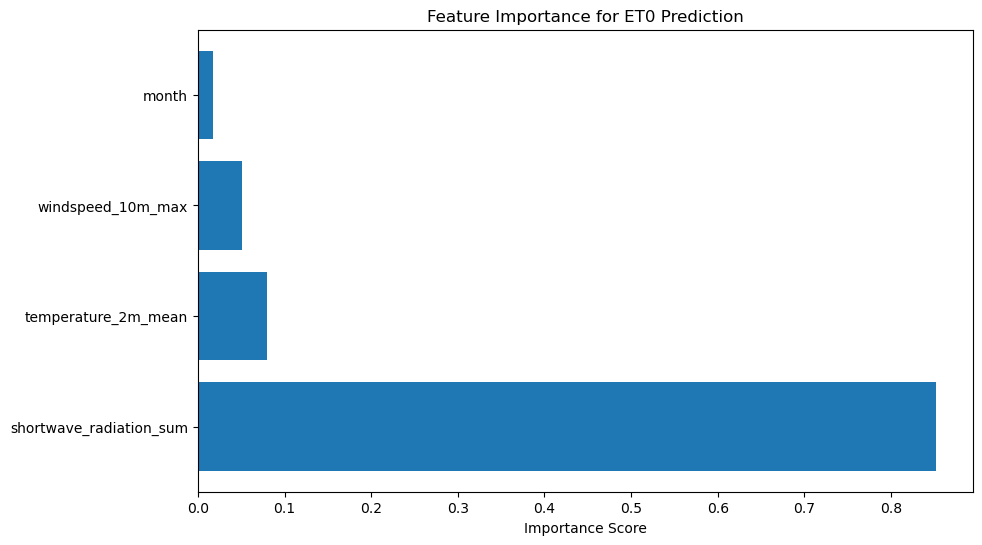

In [66]:
# 9. Feature importance analysis
print("\nFeature Importance from Random Forest:")
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance for ET0 Prediction')
plt.xlabel('Importance Score')
plt.show()

In [67]:
#Advanced Visualization

In [68]:
#Seasonal Temperature Distribution

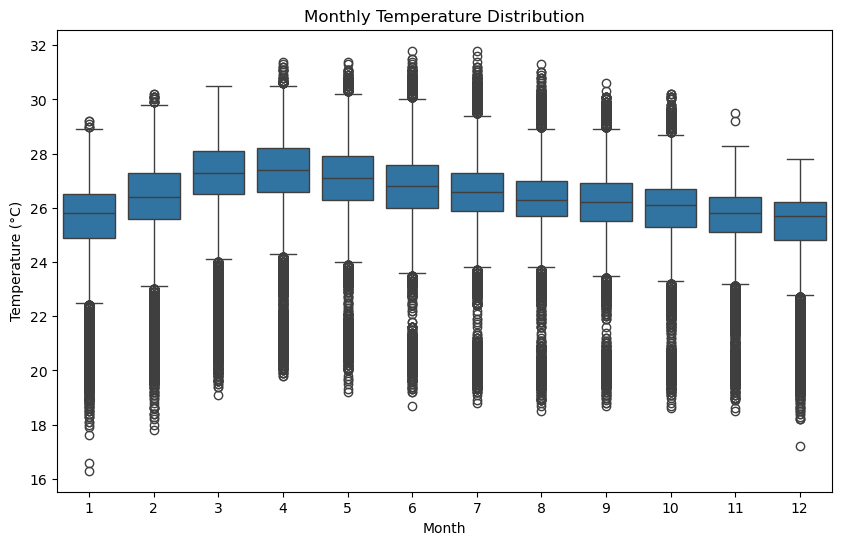

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='temperature_2m_mean', data=df)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [70]:
#ET₀ vs Solar Radiation Relationship

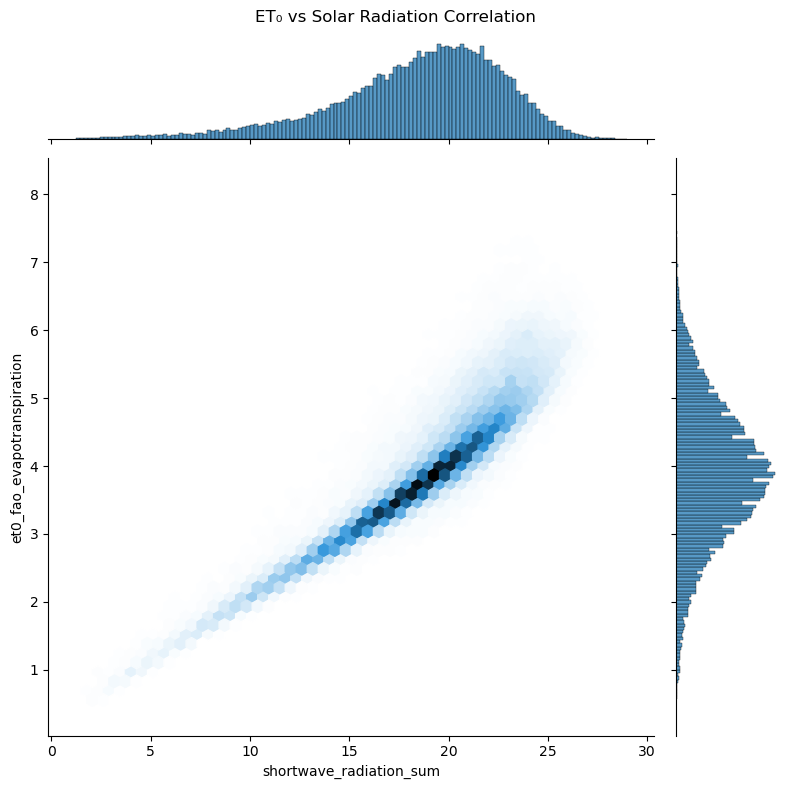

In [71]:
sns.jointplot(x='shortwave_radiation_sum', y='et0_fao_evapotranspiration',
             data=df, kind='hex', height=8)
plt.suptitle('ET₀ vs Solar Radiation Correlation')
plt.tight_layout()

Text(0.5, 0.98, 'ET₀ vs Solar Radiation with Regression Fit')

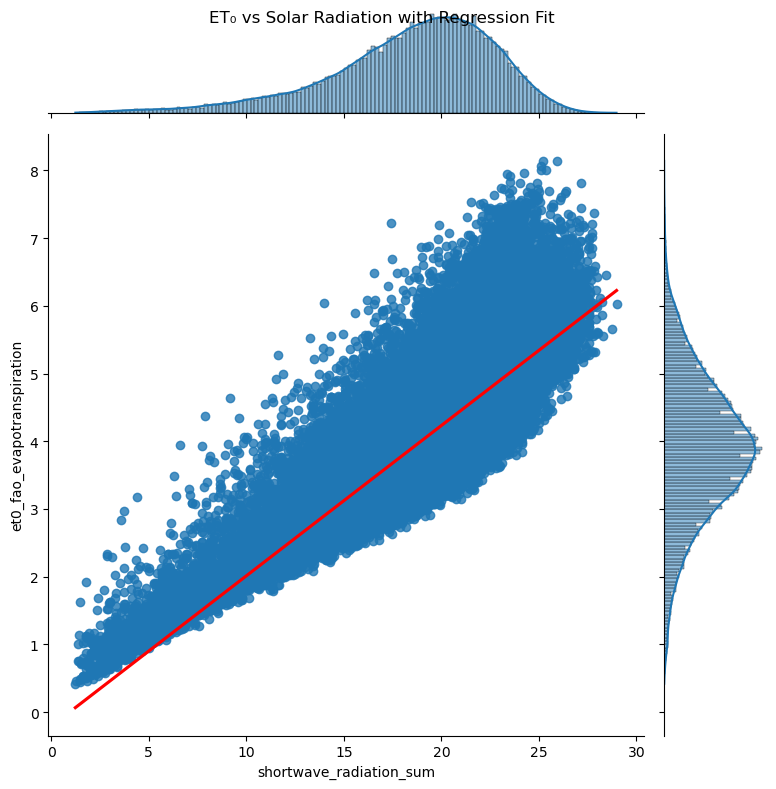

In [72]:
sns.jointplot(
    x='shortwave_radiation_sum', 
    y='et0_fao_evapotranspiration',
    data=df, 
    kind='reg',  # Adds regression line
    height=8,
    joint_kws={'line_kws':{'color':'red'}}
)
plt.suptitle('ET₀ vs Solar Radiation with Regression Fit')

In [73]:
# Add to imports
import joblib

# After model training (for both temperature and ET0 models)
joblib.dump(rf, 'temperature_model.pkl')
joblib.dump(models["Random Forest"], 'et0_model.pkl')

['et0_model.pkl']